<a href="https://colab.research.google.com/github/Prerana-Bijekar/ML/blob/main/Bonus-Assignment-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
def load_csv(filepath):
    return pd.read_csv(filepath)
import pandas as pd
df = pd.read_csv('Housing Dataset.csv')
df.head()

Saving Housing Dataset.csv to Housing Dataset.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
# Selecting relevant features (area, bedrooms) and target (price)
X = df[['area', 'bedrooms']]  # Features: Square footage, number of rooms
y = df['price']  # Target variable: Price of the house

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. KNN Model with different values of k
k_values = [3, 5, 7, 9, 11]  # Experimenting with different k values
knn_mae = []
knn_mse = []
knn_rmse = []

for k in k_values:  # Loop through different k values
    # Create and train the KNN model
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred_knn = knn_model.predict(X_test_scaled)

    # Evaluate the model and store the metrics
    knn_mae.append(mean_absolute_error(y_test, y_pred_knn))
    knn_mse.append(mean_squared_error(y_test, y_pred_knn))
    knn_rmse.append(knn_mse[-1] ** 0.5)  # Calculate RMSE and append

# 2. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression model using MAE, MSE, RMSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5

# 3. Comparing KNN with Linear Regression
print("Linear Regression Performance:")
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}\n")

# Output KNN performance for each k
print("KNN Model Performance (for different values of k):")
for i, k in enumerate(k_values):
  print(f"KNN (k={k}) - MAE: {knn_mae[i]}, MSE: {knn_mse[i]}, RMSE: {knn_rmse[i]}")

Linear Regression Performance:
MAE: 1381158.8954117913, MSE: 3280176595474.013, RMSE: 1811125.7812405005

KNN Model Performance (for different values of k):
KNN (k=3) - MAE: 1393717.125382263, MSE: 3551732970183.486, RMSE: 1884604.1945680494
KNN (k=5) - MAE: 1352425.6880733946, MSE: 3381595282568.807, RMSE: 1838911.4395665734
KNN (k=7) - MAE: 1345651.376146789, MSE: 3370400798165.1377, RMSE: 1835865.1361592817
KNN (k=9) - MAE: 1327691.6411824669, MSE: 3329716475959.905, RMSE: 1824751.072327375
KNN (k=11) - MAE: 1313389.8582151788, MSE: 3191088408106.2705, RMSE: 1786361.7797373158


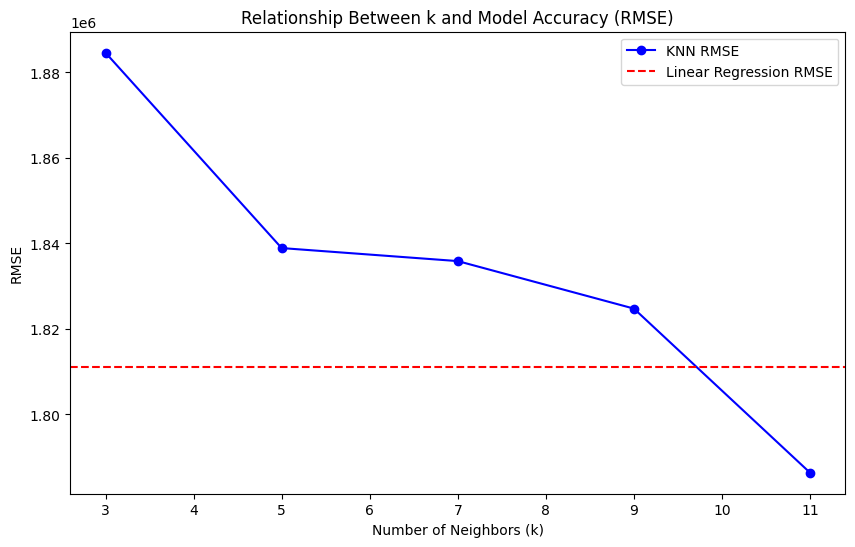

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 4. Visualization: Plot K vs RMSE (or any other metric)
plt.figure(figsize=(10, 6))

# Plot RMSE for different k values (KNN)
plt.plot(k_values, knn_rmse, label="KNN RMSE", marker='o', color='blue')

# Plot RMSE for Linear Regression
plt.axhline(rmse_lr, label="Linear Regression RMSE", color='red', linestyle='--')

# Labels and title
plt.title("Relationship Between k and Model Accuracy (RMSE)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.legend()
# Show the plot
plt.show()